 Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat Dataset from Kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cat.jpg  dogs-vs-cats.zip  kaggle.json	sampleSubmission.csv  train
dog.jpg  image_resized	   sample_data	test1.zip	      train.zip


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg', 'dog.9510.jpg', 'cat.8130.jpg', 'dog.42.jpg', 'cat.1925.jpg', 'dog.162.jpg', 'dog.11545.jpg', 'dog.7583.jpg', 'cat.9976.jpg', 'cat.11491.jpg', 'cat.664.jpg', 'cat.11009.jpg', 'cat.17.jpg', 'dog.12105.jpg', 'dog.6152.jpg', 'dog.123.jpg', 'cat.2675.jpg', 'cat.11870.jpg', 'dog.575.jpg', 'cat.5914.jpg', 'dog.6742.jpg', 'dog.9460.jpg', 'dog.10028.jpg', 'cat.11627.jpg', 'dog.4743.jpg', 'dog.2081.jpg', 'dog.1223.jpg', 'dog.8037.jpg', 'cat.174.jpg', 'dog.7438.jpg', 'cat.9648.jpg', 'cat.11819.jpg', 'dog.2343.jpg', 'cat.9692.jpg', 'cat.9796.jpg', 'cat.4963.jpg', 'cat.5789.jpg', 'dog.10914.jpg', 'dog.7664.jpg', 'dog.10451.jpg', 'cat.1353.jpg', 'dog.10738.jpg', 'cat.6060.jpg', 'cat.12208.jpg', 'cat.4326.jpg', 'dog.9151.jpg', 'cat.807.jpg', 'dog.2239.jpg', 'cat.6939.jpg', 'dog.10372.jpg', 'cat.5056.jpg', 'cat.12393.jpg', 'dog.1720.jpg', 'cat.6825.jpg', 'cat.10165.jpg', 'cat.12471.jpg', 'dog.7850.jpg', 'cat.9644.jpg',

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

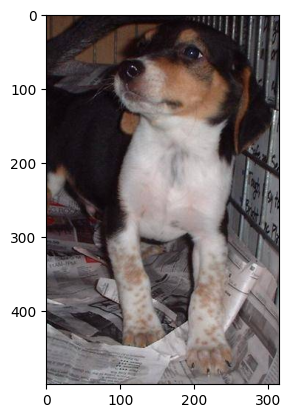

In [ ]:
#display dog image

img = mpimg.imread('/content/train/dog.3833.jpg')
plt.imshow(img)


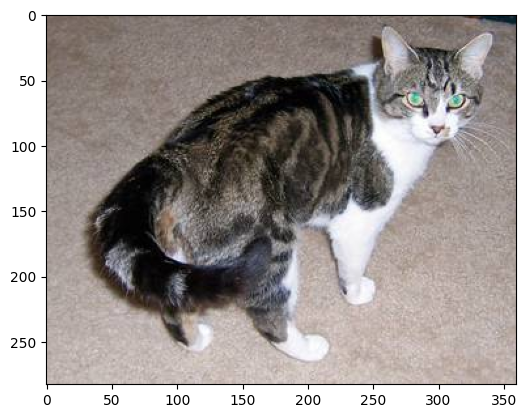

In [ ]:
#display cat image

img = mpimg.imread('/content/train/cat.5776.jpg')
plt.imshow(img)

In [ ]:
#printing the first 5 images of the images
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
dog
dog
cat
dog


In [ ]:
#counting the number of dogs and cats images

file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0


for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images :",dog_count)
print("Number of cat images :",cat_count)


Number of dog images : 12500
Number of cat images : 12500


Resizing all the images

In [ ]:
#creating a directory for resized images

os.mkdir('/content/image_resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i] #list all the names of images
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224)) #transfer learning method , mobile net accepts image with these particular dimensions
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)


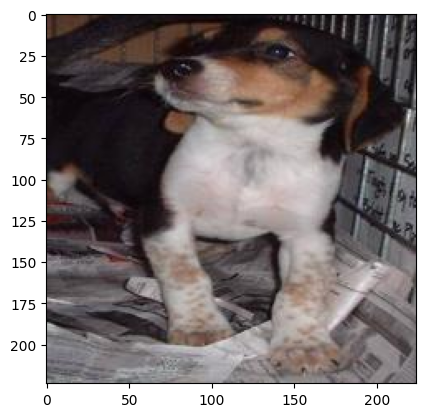

In [50]:
#display resized dog image

img = mpimg.imread('/content/image_resized/dog.3833.jpg')
plt.imshow(img)

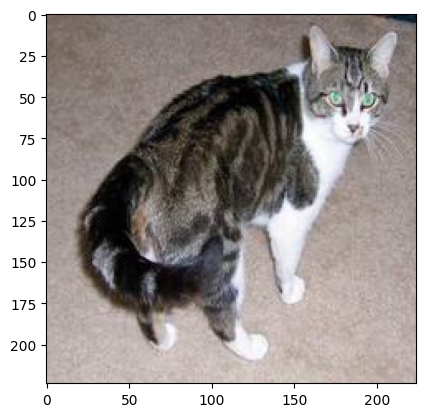

In [51]:
#display resized cat image

img = mpimg.imread('/content/image_resized/cat.5776.jpg')
plt.imshow(img)

Creating labels for resized images of dogs and cats

Cat - 0

Dog - 1

In [52]:
#creating a for loop for assigning labels
filenames = os.listdir('/content/image_resized/')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3] #first 3 letters of the image file name

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [53]:
print(filenames[0:5])
print(len(filenames))

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg']
2000


In [54]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 1]
2000


In [55]:
#counting the images of dogs and cats out of 2000 images

values , counts = np.unique(labels,return_counts = True)
print(values)
print(counts)

[0 1]
[ 978 1022]


Converting all the resized images to numpy arrays

In [56]:
import cv2
import glob

In [57]:
image_directory = '/content/image_resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e))for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files]) #cv2 will convert all the images to individual numpy array , and asarray
#method combines it into single numpy array

In [58]:
print(dog_cat_images)

[[[[ 25  26  36]
   [ 20  21  31]
   [ 20  18  30]
   ...
   [ 39  67  68]
   [ 76 104 105]
   [ 52  80  80]]

  [[ 25  26  36]
   [ 20  21  31]
   [ 21  19  31]
   ...
   [ 53  81  82]
   [ 87 115 116]
   [113 144 143]]

  [[ 25  27  37]
   [ 20  22  32]
   [ 19  19  31]
   ...
   [ 58  88  89]
   [ 62  92  93]
   [116 148 147]]

  ...

  [[255 166 236]
   [255 167 237]
   [255 173 243]
   ...
   [255 253 255]
   [255 253 255]
   [255 254 255]]

  [[255 168 237]
   [255 166 235]
   [255 170 238]
   ...
   [255 252 255]
   [255 252 255]
   [255 253 255]]

  [[255 170 239]
   [255 166 235]
   [253 166 234]
   ...
   [255 252 255]
   [255 252 255]
   [255 253 255]]]


 [[[108  60  24]
   [102  58  27]
   [ 87  52  32]
   ...
   [ 13  21  20]
   [  7  15  14]
   [  6  14  13]]

  [[105  57  21]
   [101  57  26]
   [ 89  54  34]
   ...
   [ 19  27  26]
   [ 10  18  17]
   [  6  14  13]]

  [[106  59  21]
   [104  61  28]
   [ 95  58  36]
   ...
   [ 27  33  32]
   [ 12  20  19]
   [  6  14

In [59]:
type(dog_cat_images)

numpy.ndarray

In [60]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [61]:
x = dog_cat_images
y = np.asarray(labels)

Train Test Split

In [62]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(2000, 224, 224, 3)
(1600, 224, 224, 3)
(400, 224, 224, 3)


1600 - Training images

400 - Test images

In [64]:
#scaling the data between 0 and 1

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [65]:
print(x_train_scaled)

[[[[0.36078431 0.35294118 0.37647059]
   [0.36078431 0.35294118 0.37647059]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.41568627 0.40392157 0.41176471]
   [0.42352941 0.41176471 0.41960784]
   [0.42745098 0.41568627 0.42352941]]

  [[0.36078431 0.35294118 0.37647059]
   [0.35686275 0.34901961 0.37254902]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.41960784 0.40784314 0.41568627]
   [0.41960784 0.40784314 0.41568627]
   [0.42352941 0.41176471 0.41960784]]

  [[0.36078431 0.35294118 0.37647059]
   [0.35686275 0.34901961 0.37254902]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.42352941 0.41176471 0.41960784]
   [0.41960784 0.40784314 0.41568627]
   [0.41960784 0.40784314 0.41568627]]

  ...

  [[0.45098039 0.44313725 0.44313725]
   [0.4627451  0.45490196 0.45490196]
   [0.47058824 0.4627451  0.4627451 ]
   ...
   [0.14117647 0.14901961 0.14901961]
   [0.10196078 0.10980392 0.10980392]
   [0.09803922 0.10588235 0.10588235]]

  [[0.43921569 0.43137255 0.43137255]
   [0.4

Building the neural network

In [81]:
import tensorflow as tf
import tensorflow_hub as hub

In [82]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)


In [83]:
num_of_classes = 2 #number of types of images , ie, dogs and cats

#mobilenet is a pre-trained model , so it has its own pre-defined number of layers , we only have to mention the output layer
model = tf.keras.Sequential([

      pretrained_model,
      tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [84]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['acc']
)

In [85]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 50s 918ms/step - loss: 1.0331 - acc: 0.7306
Epoch 2/5
50/50 [==============================] - 47s 945ms/step - loss: 0.6381 - acc: 0.7912
Epoch 3/5
50/50 [==============================] - 47s 935ms/step - loss: 0.6381 - acc: 0.7925
Epoch 4/5
50/50 [==============================] - 47s 920ms/step - loss: 0.6381 - acc: 0.7919
Epoch 5/5
50/50 [==============================] - 47s 946ms/step - loss: 0.6381 - acc: 0.7919


In [86]:
score , acc = model.evaluate(x_test_scaled,y_test)
print("Test Loss Function : ", score)
print("Test Accuracy : ", acc)

13/13 [==============================] - 12s 918ms/step - loss: 0.6429 - acc: 0.7900
Test Loss Function :  0.6428940296173096
Test Accuracy :  0.7900000214576721


Predictive System

Path of the image to be predicted: /content/cat.jpg


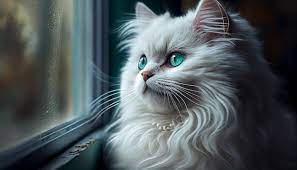

1/1 [==============================] - 0s 48ms/step
[[-2.5265074 -4.034051 ]]
0
The image represents a Cat


In [89]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


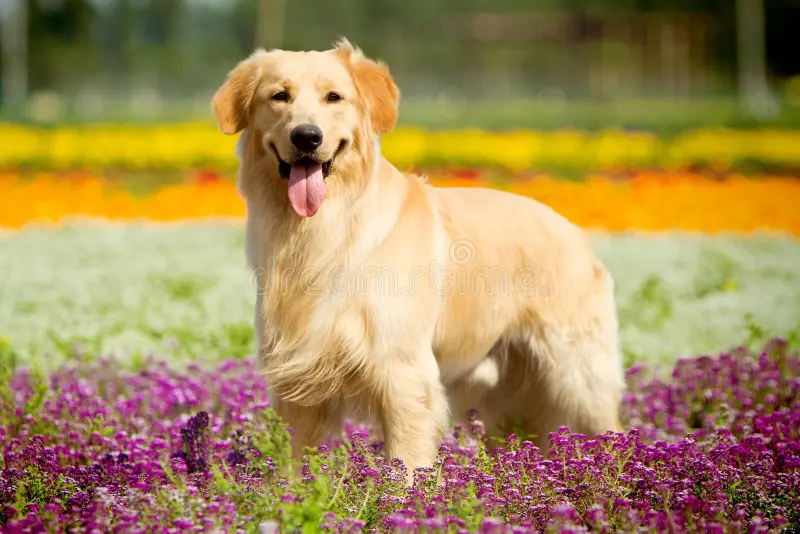

1/1 [==============================] - 0s 123ms/step
[[-2.3362145   0.02345433]]
1
The image represents a Dog


In [91]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')